# Reproducibility and Documentation

This section creates a documentation text file containting the versions for each python module, material data parameters, and IM module code version. 

The cell below also creates a set of plots for each material and comparison to the data in the IHED database http://www.ihed.ras.ru/


In [1]:
#@title Double-click to collapse code

# Collect files needed to run this notebook in the cloud (e.g., Google CoLab)
import os
from os.path import exists

# Collect files needed to run this notebook in the cloud (e.g., Google CoLab)
if not exists('materials-data.csv'):
    # material database
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/materials-data.csv?raw=true -O materials-data.csv')
if not exists('IM_module.py'):
    # IM_modules for this notebook
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/IM_module.py?raw=true -O IM_module.py')
if not exists('IM_app.py'):
    # IM_modules for this notebook
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/IM_app.py?raw=true -O IM_app.py')
if not os.path.isdir('database-user/'):
    os.mkdir('database-user')
    print('made local directory: database-user')
if not os.path.exists('database-user/Root-fused-silica.csv'):
    # fetch the file from the GitHub repo
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/database-user/Root-fused-silica.csv?raw=true -O database-user/Root-fused-silica.csv')
if not exists('materials-new.csv'):
    # material database
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/materials-new.csv?raw=true -O materials-new.csv')
if not exists('PetaviusLangrenus_Poupeau_3000.png'):
    # IM_modules for this notebook
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/PetaviusLangrenus_Poupeau_3000.png?raw=true -O PetaviusLangrenus_Poupeau_3000.png')

    

In [2]:
%%capture cap --no-stderr
# Saves the output txt and images from this cell to the variable cap
# the next cell prints to a file and displays in the notebook
# capture and other ipython magic here:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html

# Record the verions information for these calculation for posterity
import platform
version_txt='python '+platform.python_version()+'\n'
del platform
import matplotlib
version_txt = version_txt+'matplotlib '+ matplotlib.__version__+'\n'
del matplotlib
import numpy
version_txt = version_txt+'numpy '+ numpy.__version__+'\n'
del numpy
#import scipy
#version_txt = version_txt+'scipy '+ scipy.__version__+'\n'
#del scipy
import pandas
version_txt = version_txt+'pandas '+ pandas.__version__+'\n'
del pandas
import ipywidgets
version_txt = version_txt+'ipywidgets '+ ipywidgets.__version__+'\n'
del ipywidgets
import IM_module # custom classes and functions for this impedance match notebook
version_txt = version_txt+'IM_module '+ IM_module.__version__+'\n'
del IM_module

# date & time used for unique output file name below
from datetime import datetime
datetimenow=datetime.now()
datetimestr=datetimenow.strftime("%Y%m%d-%H-%M-%S")
version_txt = 'Date and time: '+ str(datetimenow)+'\n'+version_txt
#
print('Record the version information and date for this Jupyter Notebook execution:')
print(version_txt)

# import python libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Impedance Match Calculation classes and functions
import IM_module as IM # classes and functions for this impedance match notebook
from IM_app import IM_app

# load the materials data table; change matfilename if not using default
matdata, imat = IM.ReadMaterials(matfilename='materials-data.csv')

print('Index book-keeping for materials data csv file:')
vars(imat)
print('Materials data:')
i=0
for name in matdata.loc[:,'Material'].values:
    print(matdata.loc[i,:])
    i+=1

# make plots to document the database materials
for name in matdata.loc[:,'Material'].values:
    up =np.arange(1000)*20
    mat3 = IM.Material()
    mat3.DefineParamsID(name,matdata,imat)
    pstart=100.e9
    mat3.MakeHugoniot(up)
    mat3.PlotCurves(pstart,1)
for name in matdata.loc[:,'Material'].values:
    mat3 = IM.Material()
    mat3.DefineParamsID(name,matdata,imat)
    up =np.arange(1000)*20
    mat3.GetIHED()
    mat3.PlotIHED(1)



Record the version information and date for this Jupyter Notebook execution:
Date and time: 2022-11-19 13:54:18.726476
python 3.9.12
matplotlib 3.5.1
numpy 1.21.5
pandas 1.4.2
ipywidgets 7.6.5
IM_module 1.1.0

Index book-keeping for materials data csv file:
Materials data:
Material                                  Aluminium 6061
Density(kg/m3)                                    2683.0
rho0_err                                              -1
c0(m/s)                                           5349.0
c0_err                                                -1
s1                                                 1.338
s1_err                                                -1
s2(s/m)                                              0.0
s2_err                                                -1
d(s/m)                                               0.0
d_err                                                0.0
g0                                                   1.0
g0_err                                    

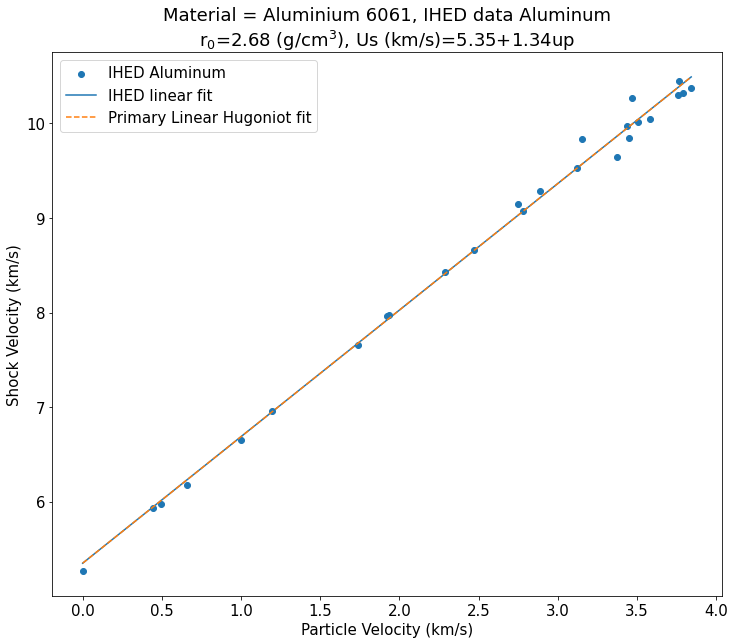

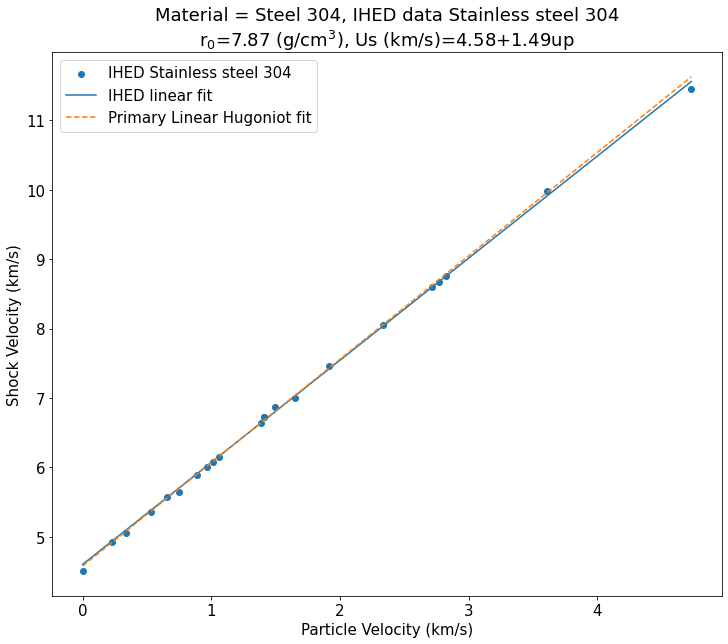

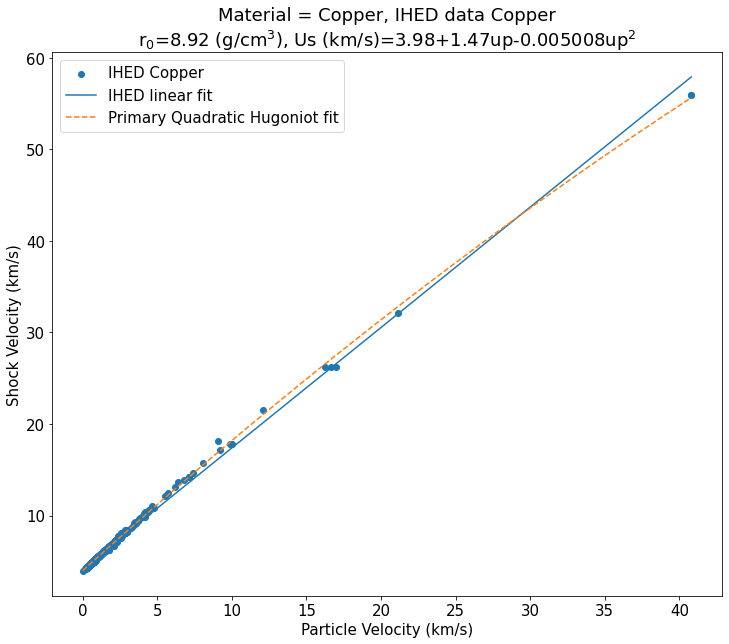

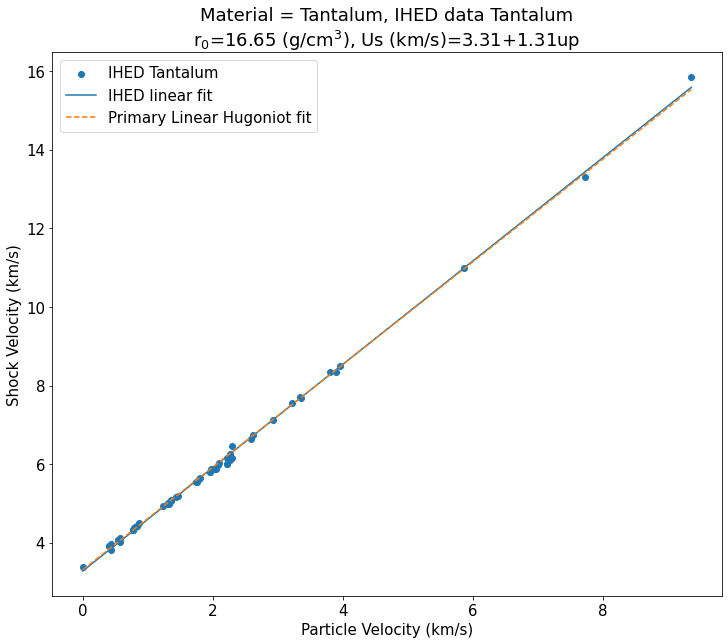

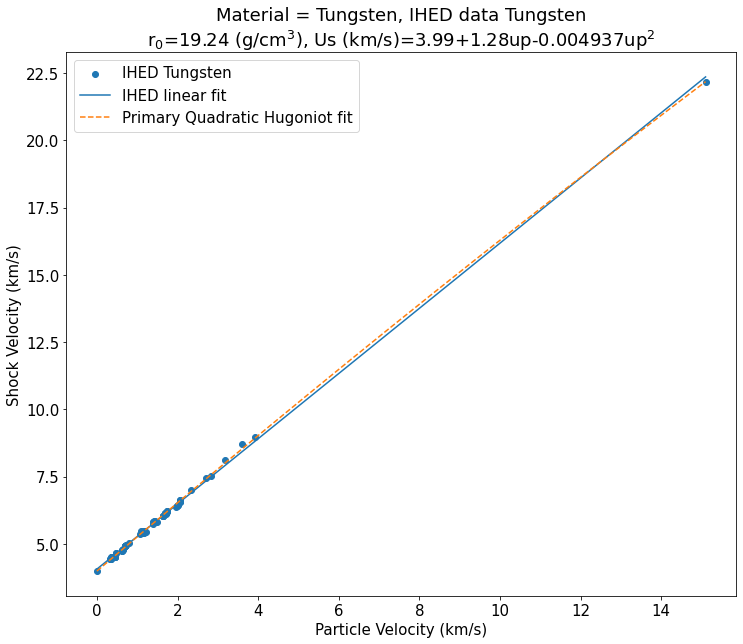

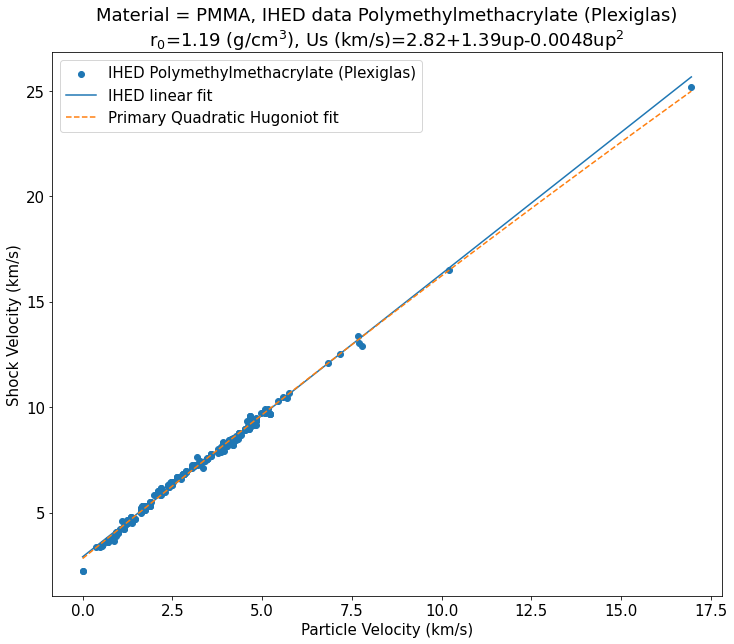

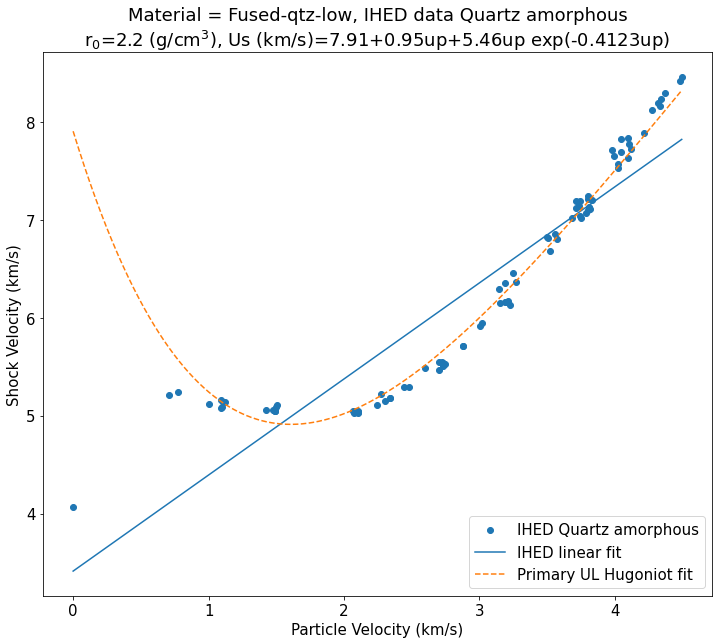

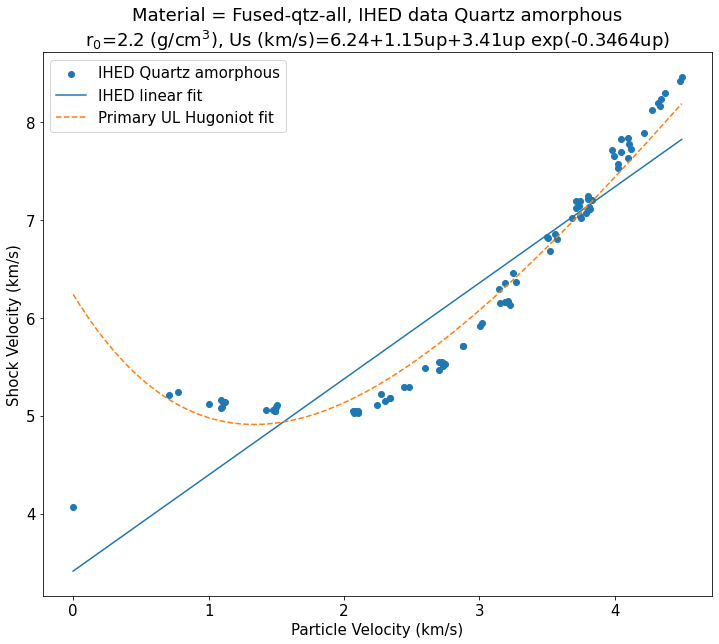

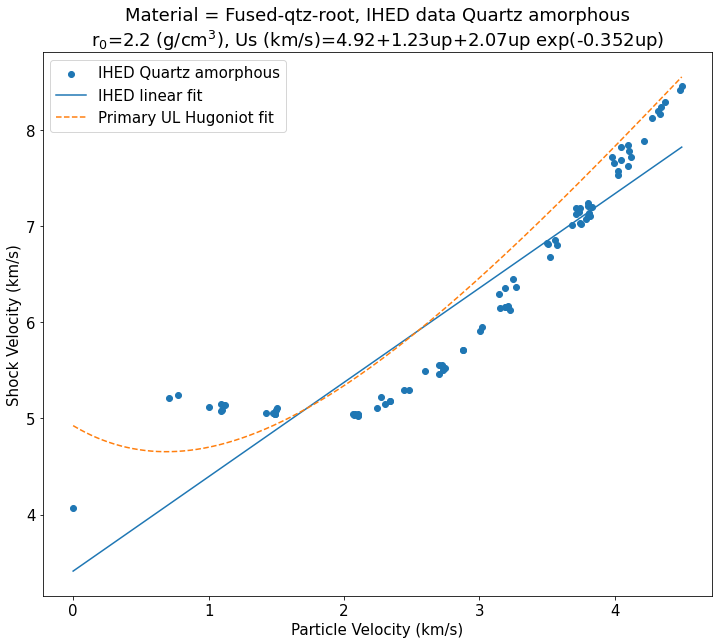

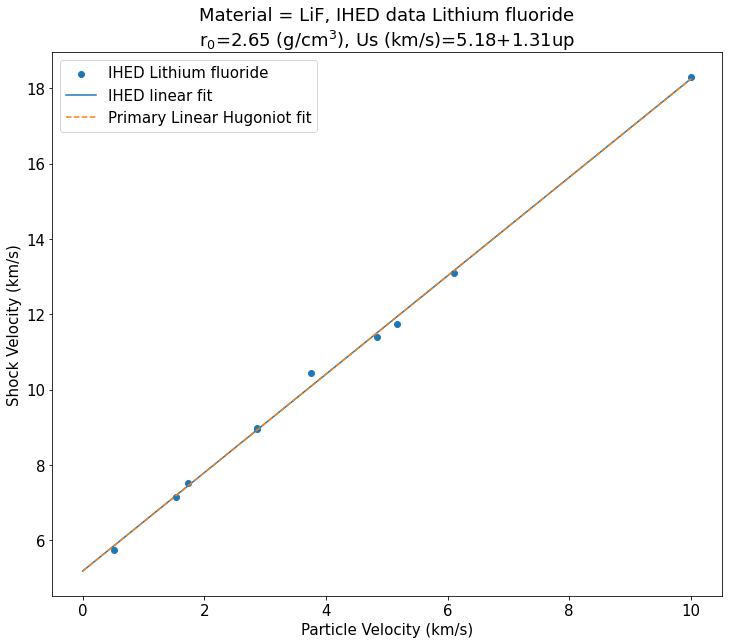

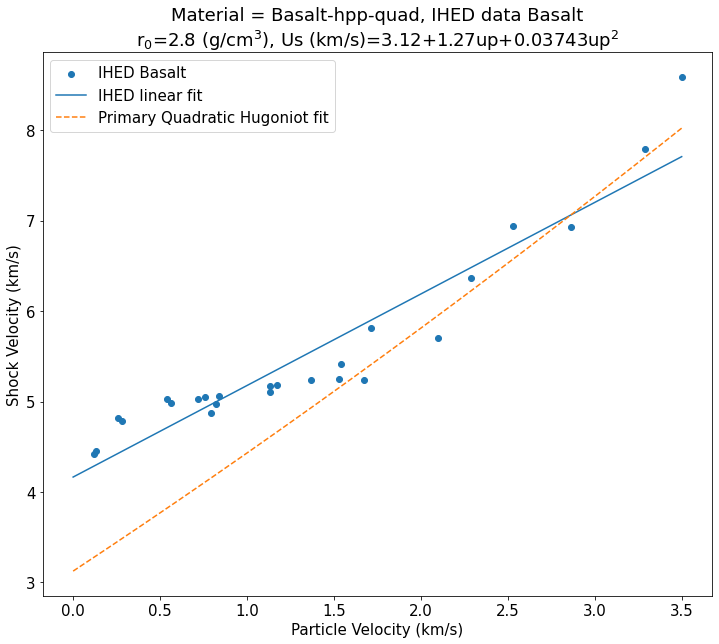

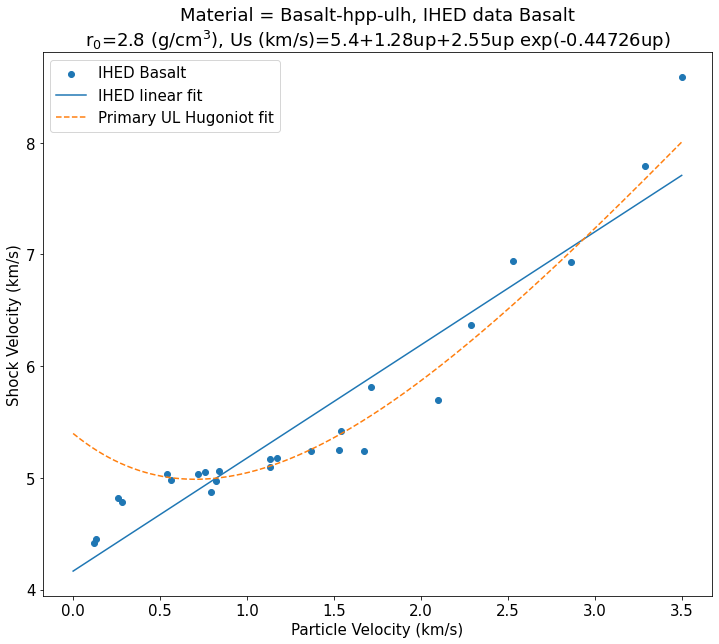

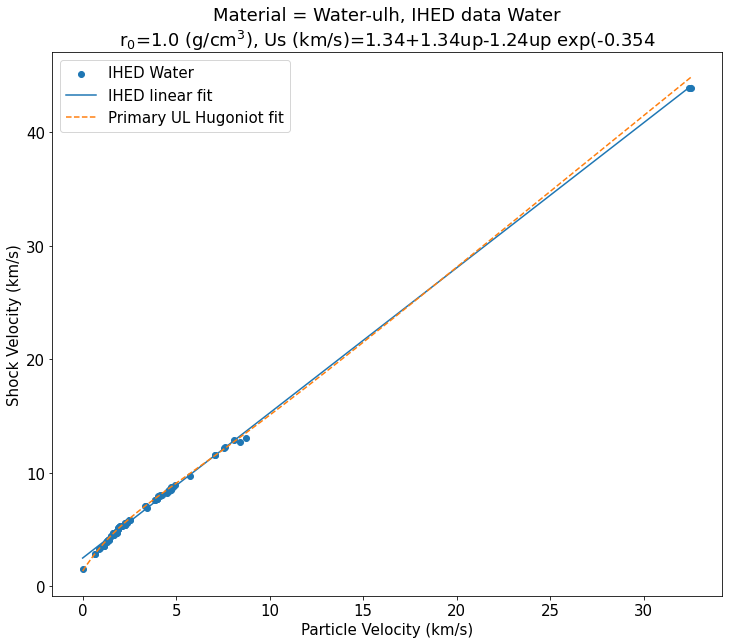

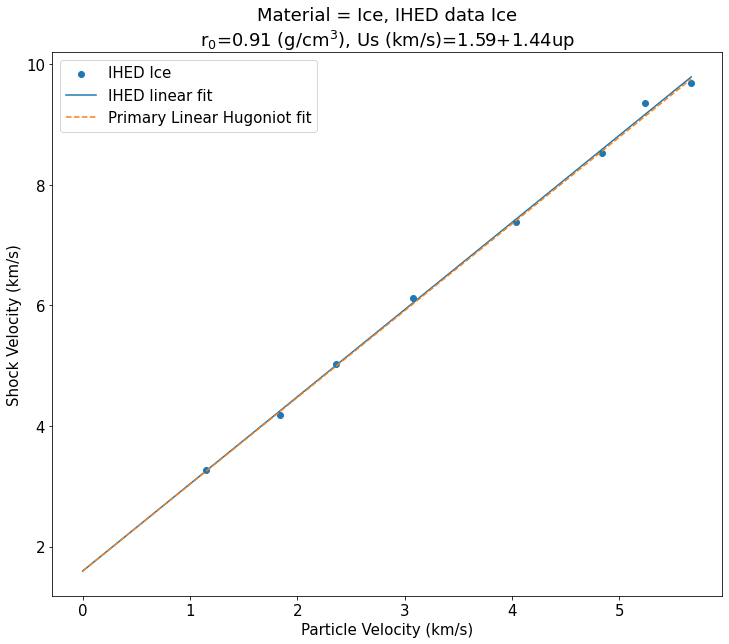

In [3]:
outputfilename = 'Impedance-match-reproducibility-v'+IM.__version__+'-'+datetimestr+'.txt'
with open(outputfilename, 'w') as f:
    f.write(cap.stdout)
#
# The output in the previous cell is written to a text file and plot files
# print txt and images here for the notebook
cap.show()

## Some Materials Were Fitted with Additional Data
Plots to document these fits for:

* Basalt-hpp-ulh
* Fused-qtz-all
* Fused-qtz-low


Including user data
Quartz amorphous Fused-qtz-low fit (mks) c0= 7906.4375123213  s1= 0.9485918096300816  s2= 5.455085918915088  d= 0.0004122973572337611
N=211. Fit stdev (km/s)=0.6484358765452278
Primary Hugoniot parameters c0,s1,s2,d= 7906.0 0.9486 5.455 0.0004123


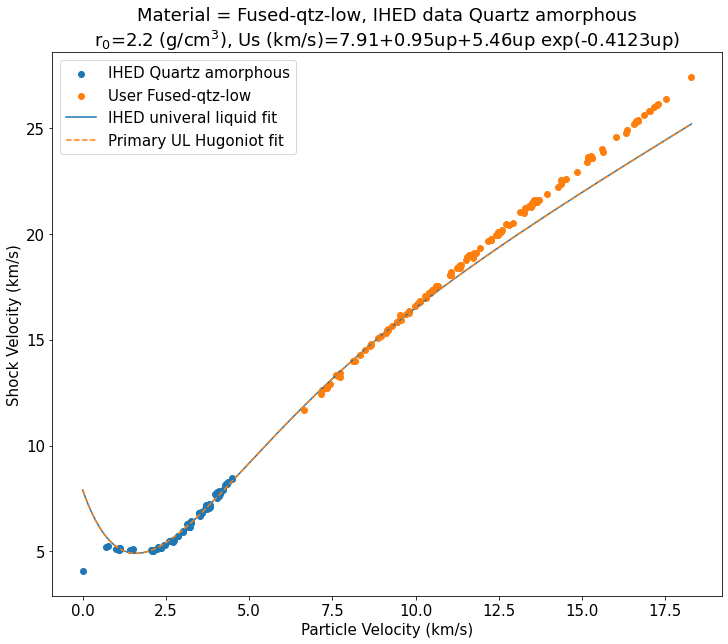

In [4]:
# note the fit for fused quartz is for after the anomalous compression region
fsdata=pd.read_csv('database-user/Root-fused-silica.csv')  # https://doi.org/10.1063/1.5126205
fsmoredata1 = np.append(np.asarray([2200.]),fsdata.loc[:,'UP(km/s)'].values*1.e3) # m/s
fsmoredata = np.append(fsmoredata1,fsdata.loc[:,'US(km/s)'].values*1.e3) # m/s

mat4 = IM.Material()
matname='Fused-qtz-low'
mat4.DefineParamsID(matname,matdata,imat)
mat4.GetIHED(formflag=3,upmin=1000.,upmax=10000,moredata=fsmoredata) # example of plotting user data to include in the fit
mat4.PlotIHED(savebool=True,fname='IHED-plot-'+mat4.name+'-v'+IM.__version__+'-low-withaddeddata.pdf')


Including user data
Quartz amorphous Fused-qtz-all fit (mks) c0= 6239.612821072471  s1= 1.1536360545400353  s2= 3.4133013943453463  d= 0.0003464315808810986
N=211. Fit stdev (km/s)=0.19441939583803938
Primary Hugoniot parameters c0,s1,s2,d= 6239.6 1.1536 3.4133 0.00034639999999999996


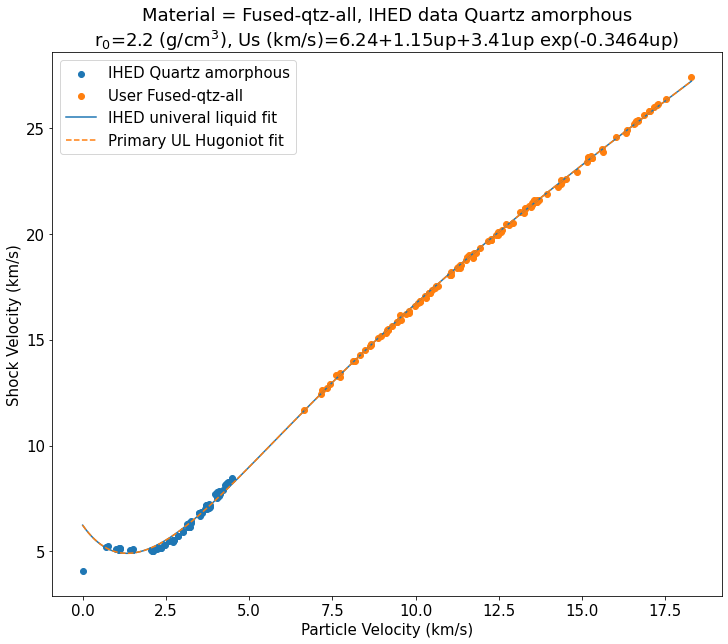

In [5]:
# refit quartz with IHED + root data
# moredata format is [rho0,[uparr],[usarr]]
fsdata=pd.read_csv('database-user/Root-fused-silica.csv')  # https://doi.org/10.1063/1.5126205
fsmoredata1 = np.append(np.asarray([2200.]),fsdata.loc[:,'UP(km/s)'].values*1.e3) # m/s
fsmoredata = np.append(fsmoredata1,fsdata.loc[:,'US(km/s)'].values*1.e3) # m/s

mat4 = IM.Material()
matname='Fused-qtz-all'
mat4.DefineParamsID(matname,matdata,imat)
mat4.GetIHED(formflag=3,upmin=0.,upmax=20000,moredata=fsmoredata) # example of plotting user data to include in the fit
mat4.PlotIHED(savebool=True,fname='IHED-plot-'+mat4.name+'-v'+IM.__version__+'-all-withaddeddata.pdf')


Got IHED data:  Basalt 636 Basalt, Vacaville, R0 =  2.860 g/cc
Basalt Basalt fit (mks) c0= 5397.022703758356  s1= 1.2796505146110337  s2= 2.550443303757193  d= 0.0004472590051925441
N=35. Fit stdev (km/s)=0.2712649008259699
Primary Hugoniot parameters c0,s1,s2,d= 5397.0 1.279 2.55 0.00044726


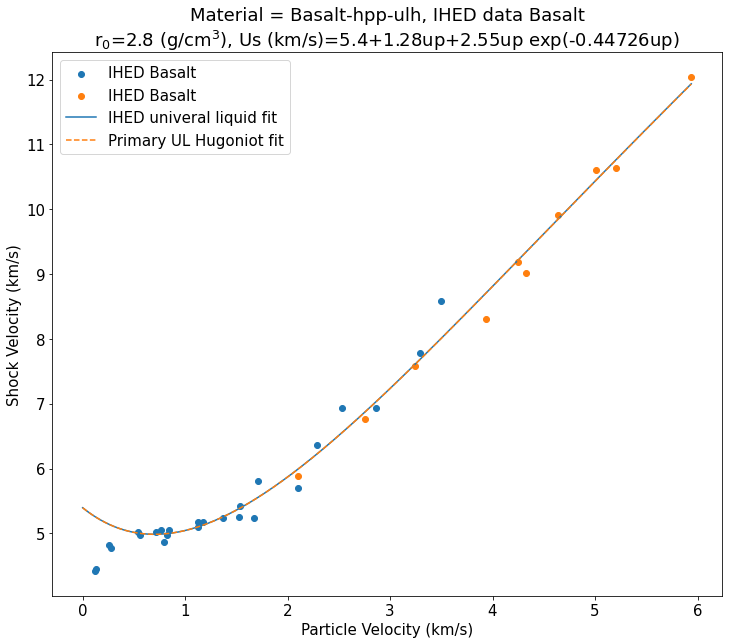

In [6]:
# Note that the fit to basalt is for the high-pressure phase region only
mat3 = IM.Material()
matname='Basalt-hpp-ulh'
mat3.DefineParamsID(matname,matdata,imat)
mat3.GetIHED(formflag=3,upmin=500,id2=636) # example of plotting a second set of IHED data and limiting the fit
mat3.PlotIHED(savebool=True,fname='IHED-plot-'+mat3.name+'-v'+IM.__version__+'-withaddeddata.pdf')


In [7]:
# print version information
print('Impedance Match module version: ',IM.__version__)
help(IM_app)


Impedance Match module version:  1.1.0
Help on function IM_app in module IM_app:

IM_app(webappbool=False)
    Shock Impedance Matching Tool and code. 
    Usage: IM_app(matdata,imat,webappbool=False)
    Inputs: materials parameters DataFrame and database indices objects.
            Optional boolean to use local copy of IHED in subdirectory database-ihed.
            If material not local, will fetch from IHED web site and save a local copy.
    Output: panel app (https://panel.holoviz.org/index.html)
    Requires IM_module loaded as IM. Variables in MKS.
    v1.0.0 - November 12, 2022 - S.T.Stewart
    v1.0.1 - 11/13/22 STS code cleanup and documentation
    v1.0.2 - 11/14/22 STS framing the app
    v1.0.3 - 11/15/22 STS auto-resize the plot; added panel to add a new material
    v1.1.0 - 11/17/22 STS rewrote the IM match into a function and cleaned up error messaging

